In [16]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# File to Load
teen_pregnancies_to_load = Path("Resources/NCHS_-_U.S._and_State_Trends_on_Teen_Births.csv")
school_funding_path = Path("Resources/clean_funding_data.csv")

# Read School and Teen Pregnancie data file and store into Pandas DataFrames
teen_pregnancies_data = pd.read_csv(teen_pregnancies_to_load)
school_funding_data = pd.read_csv(school_funding_path)

# Get teen data for 2019 and change "Total U.S." to just United States
teen_pregnancies_data = teen_pregnancies_data[teen_pregnancies_data["Year"] > 2018]
teen_pregnancies_data.loc[[4568, 4620, 4672], "State"] = "United States"

# Clean school funding data 
# One row is completly empty lets get rid of it
# Rename some columns for readability and for merge purposes
school_funding_data.dropna(inplace=True)
school_funding_data = school_funding_data.rename(columns = {"Unnamed: 0":"State",
                                      "Total": "Total Revenue",
                                      "Total.1":"Total Expenditure",
                                      "Other2":"Other"})

# Quick note:
# All data left of "Total Expenditure" is revenue 
# All data right of "Total Expenditure" is expenditure

# Merge both data sets
full_data = pd.merge(school_funding_data, teen_pregnancies_data, on = ["State", "State"], how = "outer")
full_data

# There is a total of 52 unique "States" D.C. and the United States(Total) account for the extra two
# Each "State" has three rows to display pregnancie from 15-17, 15-19, 18-19 for a total of 156 rows

,State,Total Revenue,From federal sources,From state sources,From local sources,Total Expenditure,Current spending,Capital outlay,Other 2,Debt outstanding at end of fiscal year,Cash and securities,Year,Age Group (Years),State Rate,State Births,U.S. Births,U.S. Birth Rate,Unit
0,United States,751195882.0,57878962.0,350913041,342403879.0,752313761.0,652295832.0,76281609.0,23736320.0,494943150.0,270503906,2019,15-17 years,6.7,"41,081","41,081",6.7,"per 1,000"
1,United States,751195882.0,57878962.0,350913041,342403879.0,752313761.0,652295832.0,76281609.0,23736320.0,494943150.0,270503906,2019,15-19 years,16.7,"171,674","171,674",16.7,"per 1,000"
2,United States,751195882.0,57878962.0,350913041,342403879.0,752313761.0,652295832.0,76281609.0,23736320.0,494943150.0,270503906,2019,18-19 years,31.1,"130,593","130,593",31.1,"per 1,000"
3,Alabama,8412132.0,867947.0,4703782,2840403.0,8360002.0,7588368.0,593970.0,177664.0,4863725.0,2577325,2019,15-17 years,10.1,925,"41,081",6.7,"per 1,000"
4,Alabama,8412132.0,867947.0,4703782,2840403.0,8360002.0,7588368.0,593970.0,177664.0,4863725.0,2577325,2019,15-19 years,25.6,"3,955","171,674",16.7,"per 1,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Wisconsin,12393896.0,820330.0,6823763,4749803.0,12597517.0,10916575.0,1351644.0,329298.0,7715780.0,4835196,2019,15-19 years,12.5,"2,318","171,674",16.7,"per 1,000"
152,Wisconsin,12393896.0,820330.0,6823763,4749803.0,12597517.0,10916575.0,1351644.0,329298.0,7715780.0,4835196,2019,18-19 years,24.0,"1,835","130,593",31.1,"per 1,000"
153,Wyoming,1795211.0,132060.0,964553,698598.0,1716125.0,1532273.0,181815.0,2037.0,49650.0,772233,2019,15-17 years,6.6,70,"41,081",6.7,"per 1,000"
154,Wyoming,1795211.0,132060.0,964553,698598.0,1716125.0,1532273.0,181815.0,2037.0,49650.0,772233,2019,15-19 years,19.4,338,"171,674",16.7,"per 1,000"


<BarContainer object of 52 artists>

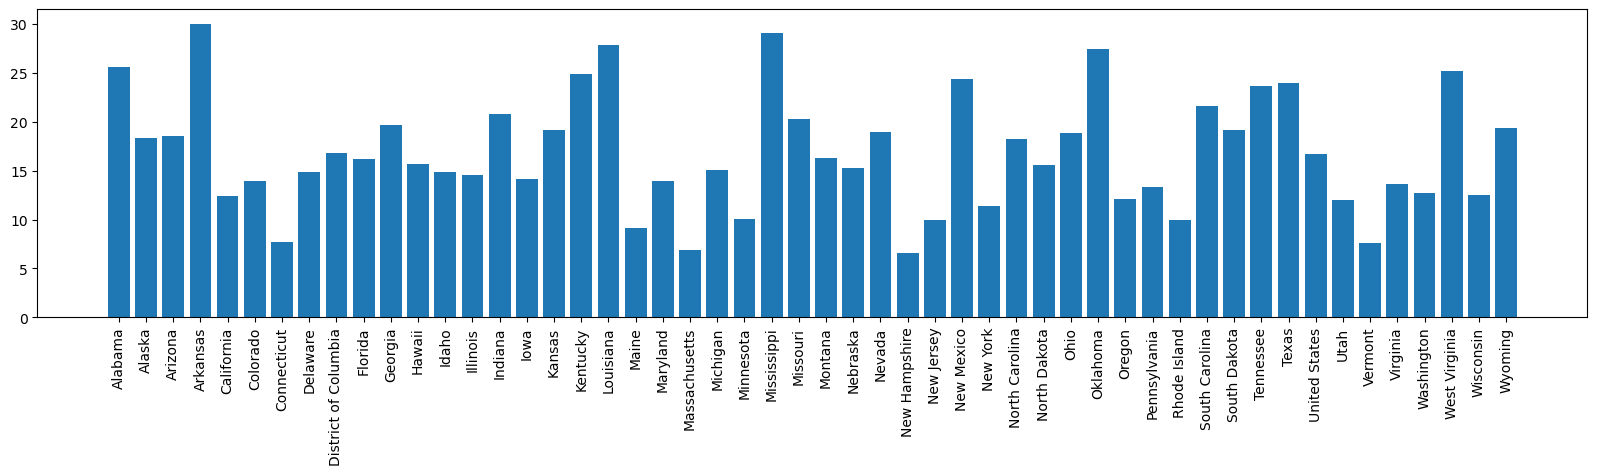

In [47]:
# Create the bar graph for 52 states wit regard to pregancy rates:
# Isolate Age Group (15-19), and birthrates(%):
birthrate = teen_pregnancies_data[teen_pregnancies_data["Age Group (Years)"] == "15-19 years"]["State Rate"]
state = teen_pregnancies_data["State"].unique()
# Plot the data:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.bar(state, birthrate)